## Import all the libraries

In [113]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)import
import numpy as np    # linear algebra
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 


import warnings
warnings.filterwarnings('ignore')

In [33]:
pd.set_option("display.max_rows",None)

In [34]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [35]:
df.columns = map(str.capitalize , df.columns)

In [36]:
df.rename(columns = {'Date_added' : 'Date Added', 'Release_year' : 'Release Year'} , inplace = True)

In [37]:
df.head(2)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [38]:
df.describe(include='all').head()

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description
count,7787,7787,7787,5398,7069,7280,7777,7787.00000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.93258,NaN,NaN,NaN,NaN


In [39]:
# The total numbers of the columns and rows of the dataset

df.shape

(7787, 12)

In [40]:
# The total amount of values or otherwise elements in our dataset

df.size

93444

In [41]:
# More information about the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       7787 non-null   object
 1   Type          7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5398 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Date Added    7777 non-null   object
 7   Release Year  7787 non-null   int64 
 8   Rating        7780 non-null   object
 9   Duration      7787 non-null   object
 10  Listed_in     7787 non-null   object
 11  Description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [43]:
# View all the columns name of the dataset 

df.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date Added',
       'Release Year', 'Rating', 'Duration', 'Listed_in', 'Description'],
      dtype='object')

In [44]:
# View the data type of each column

df.dtypes

Show_id         object
Type            object
Title           object
Director        object
Cast            object
Country         object
Date Added      object
Release Year     int64
Rating          object
Duration        object
Listed_in       object
Description     object
dtype: object

## Dealing with the missing data or duplicates

In [45]:
# We check for missing data 
# We have missing data in five columns out of the twelve

df.isnull().sum()

Show_id            0
Type               0
Title              0
Director        2389
Cast             718
Country          507
Date Added        10
Release Year       0
Rating             7
Duration           0
Listed_in          0
Description        0
dtype: int64

In [46]:
# The percentage of the missing data

print('The percentage of the missing data in our dataset is: \n')
      
for i in df.columns:
    null = ( df[i].isnull().sum() / len(df) ) * 100
    
    if null > 0:
        print('{} null percentage is : {}%'.format(i, round(null, 2)))

The percentage of the missing data in our dataset is: 

Director null percentage is : 30.68%
Cast null percentage is : 9.22%
Country null percentage is : 6.51%
Date Added null percentage is : 0.13%
Rating null percentage is : 0.09%


In [47]:
# Check for duplicate rows, luckily we don't have any

df.duplicated().sum()

0

In [48]:
# I will replace blank countries with the mode (most common) country

df['Country'] = df ['Country'].fillna(df['Country']).mode()[0]

#df['Cast'].replace(np.nan , 'No Data', inplace = True)

#df['Director'].replace(np.nan , 'No Data', inplace = True)

df.dropna(inplace = True)

In [49]:
# Double check it to make sure that i don't have any more missing data 

df.isnull().sum()

Show_id         0
Type            0
Title           0
Director        0
Cast            0
Country         0
Date Added      0
Release Year    0
Rating          0
Duration        0
Listed_in       0
Description     0
dtype: int64

In [50]:
df['Country'].value_counts()

United States    4975
Name: Country, dtype: int64

In [42]:
(df['Country'] == 'Ireland').value_counts().sum()

7787

#### Date

In [51]:
df["Date Added"] = pd.to_datetime(df['Date Added'])

In [52]:
df['Month_added']=df['Date Added'].dt.month
df['Month_name_added']=df['Date Added'].dt.month_name()
df['Year_added'] = df['Date Added'].dt.year

df.head()

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",United States,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",United States,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",United States,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7,July,2017


## Split the dataset into two subset

### movies and tv_shows

In [53]:
movies = df[df['Type'] == 'Movie']
tv_shows = df[df['Type'] == 'TV Show']

In [54]:
print('Netflix has {} movies and the {} TV Shows' .format(len(movies),len(tv_shows)))

Netflix has 4830 movies and the 145 TV Shows


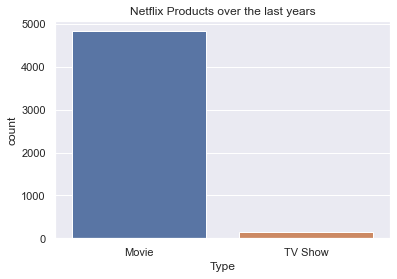

In [55]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Type']).set_title('Netflix Products over the last years')
plt.show()

#### Top 20 oldest and newest Movies and TV-Shows

In [56]:
old_20_movies = movies.sort_values('Release Year' , ascending = True)
old_20_movies[['Title', "Release Year"]][:20]

,Title,Release Year
6117,The Battle of Midway,1942
7268,Tunisian Victory,1944
3425,Know Your Enemy - Japan,1945
3608,Let There Be Light,1946
7072,Thunderbolt,1947
7595,White Christmas,1954
6141,The Blazing Sun,1954
5122,Rebel Without a Cause,1955
5425,Scandal in Sorrento,1955
6868,The Sign of Venus,1955


In [57]:
old_20_shows = tv_shows.sort_values('Release Year' , ascending = True)
old_20_shows[['Title', "Release Year"]][:20]

,Title,Release Year
3334,Ken Burns: The Civil War,1990
6148,The Blue Planet: A Natural History of the Oceans,2001
4404,Naruto,2006
4700,Ouran High School Host Club,2006
4876,Planet Earth: The Complete Collection,2006
2058,Exclusive Edition,2008
2313,Fullmetal Alchemist: Brotherhood,2010
2299,Frozen Planet,2011
2380,Geronimo Stilton,2011
4047,Merlin,2012


In [115]:
old_20_shows = tv_shows.sort_values('Release Year' , ascending = True)
old_20_shows[['Title', "Release Year"]][:20]

,Title,Release Year
3334,Ken Burns: The Civil War,1990
6148,The Blue Planet: A Natural History of the Oceans,2001
4404,Naruto,2006
4700,Ouran High School Host Club,2006
4876,Planet Earth: The Complete Collection,2006
2058,Exclusive Edition,2008
2313,Fullmetal Alchemist: Brotherhood,2010
2299,Frozen Planet,2011
2380,Geronimo Stilton,2011
4047,Merlin,2012


In [59]:
new_20_movies =  movies.sort_values('Release Year' , ascending = False)
new_20_movies[['Title', "Release Year"]][:20]

,Title,Release Year
7644,Wish You,2021
1355,Chris Rock Total Blackout: The Tamborine Exten...,2021
7220,Tribhanga - Tedhi Medhi Crazy,2021
1285,Charming,2021
7569,What Would Sophia Loren Do?,2021
7551,What Happened to Mr. Cha?,2021
5103,Ratones Paranoicos: The Band that Rocked Argen...,2021
4710,Outside the Wire,2021
511,André & his olive tree,2020
512,Anelka: Misunderstood,2020


In [60]:
new_20_tv_shows =  tv_shows.sort_values('Release Year' , ascending = False)
new_20_tv_shows[['Title', "Release Year"]][:20]

,Title,Release Year
6477,The Idhun Chronicles,2021
4724,Paava Kadhaigal,2020
2117,Fary : Hexagone,2020
3238,Julie and the Phantoms,2020
5665,Sleepless Society: Two Pillows & A Lost Soul,2020
3119,Jamtara - Sabka Number Ayega,2020
6961,The Underclass,2020
5705,Someone Has to Die,2020
1647,DC's Legends of Tomorrow,2020
1720,Detention,2020


In [61]:
# View all the movies netflix added in the year 2013

(df [ (df['Type'] == 'Movie') & ( df['Year_added'] == 2013) ]).head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",United States,2013-11-01,2011,NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A...",11,November,2013
649,s650,Movie,Aziz Ansari: Buried Alive,"Will Lovelace, Dylan Southern",Aziz Ansari,United States,2013-11-01,2013,TV-MA,80 min,Stand-Up Comedy,"""Parks and Recreation"" star Aziz Ansari takes ...",11,November,2013
2948,s2949,Movie,Iliza Shlesinger: War Paint,Jay Chapman,Iliza Shlesinger,United States,2013-09-01,2013,NR,75 min,Stand-Up Comedy,"""Last Comic Standing"" winner Iliza Shlesinger ...",9,September,2013


In [62]:
# View all the tv shows netflix added in the year 2013
# Check this show it's great 

(df [ (df['Type'] == 'TV Show') & (df['Year_added'] == 2013) ]).head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
3098,s3099,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...",United States,2013-03-31,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Ken Bruen's bestselling crime novels leap to l...,3,March,2013


In [63]:
# Search in our dataset for a specific movie or information in general
# First way 

df[df['Title'].isin(['American History X'])]

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
466,s467,Movie,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,2019-11-01,1998,R,119 min,Dramas,A neo-Nazi gets sent to prison for murder and ...,11,November,2019


In [64]:
# Second way, by using the str.contains()

df[df['Title'].str.contains('American History X')]

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
466,s467,Movie,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,2019-11-01,1998,R,119 min,Dramas,A neo-Nazi gets sent to prison for murder and ...,11,November,2019


In [65]:
# All the unique titles in the dataset

titles = df['Title'].unique().sum()

# I have comment this part of code because the results are huge.
# However, if you want to view the result, just erase the # from the last line of code in this cell

#titles

In [66]:
df.dtypes

Show_id                     object
Type                        object
Title                       object
Director                    object
Cast                        object
Country                     object
Date Added          datetime64[ns]
Release Year                 int64
Rating                      object
Duration                    object
Listed_in                   object
Description                 object
Month_added                  int64
Month_name_added            object
Year_added                   int64
dtype: object

## Year 

In [67]:
# It counts the occurence of all individual Year_added in the data

df['Year_added'].value_counts()

2019    1395
2020    1284
2018    1139
2017     769
2016     209
2021      87
2015      51
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: Year_added, dtype: int64

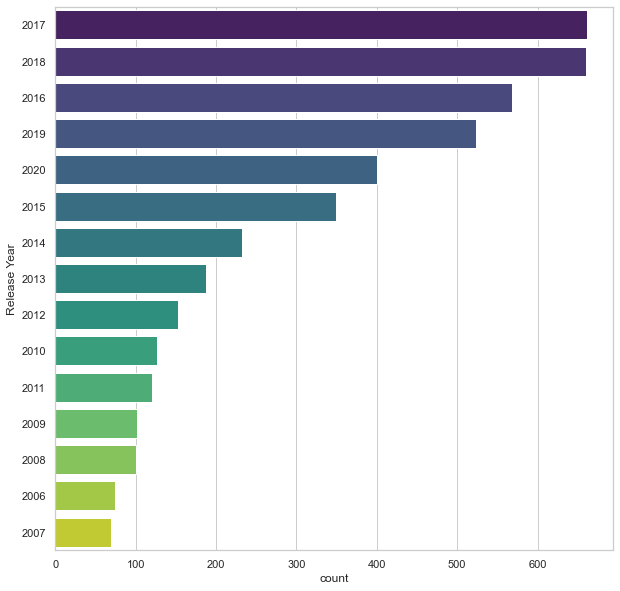

In [68]:
# The amount of movies versus each year of the dataset

plt.figure(figsize = (10, 10))
sns.set(style = 'whitegrid')
ax = sns.countplot( y = 'Release Year' , data = df , palette = 'viridis', 
                   order=movies['Release Year'].value_counts().index[0:15])

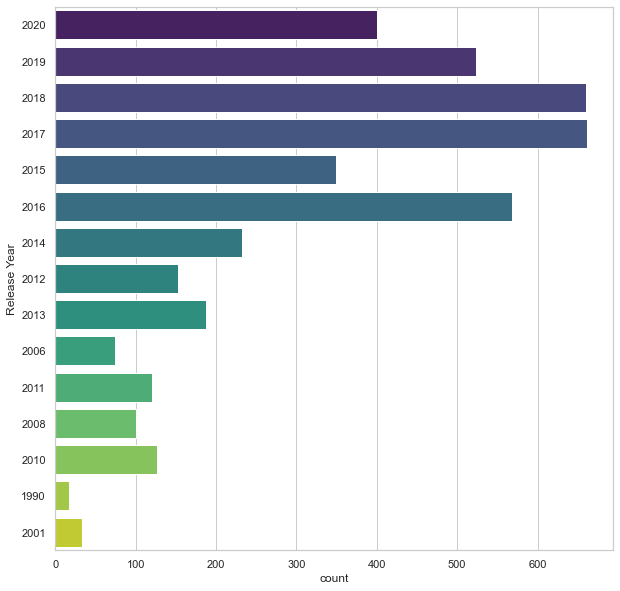

In [69]:
# The amount of tv shows versus each year of the dataset

plt.figure(figsize = (10, 10))
sns.set(style = 'whitegrid')
ax = sns.countplot( y = 'Release Year' , data = df , palette = 'viridis', 
                   order=tv_shows['Release Year'].value_counts().index[0:15])

In [70]:
# The top 10 of the directors with the most jobs with Netflix 

df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

In [71]:
# Here are all the different kind of movies - shows our dataset contains

df['Listed_in'].value_counts()

Dramas, International Movies                                              319
Stand-Up Comedy                                                           296
Comedies, Dramas, International Movies                                    240
Dramas, Independent Movies, International Movies                          215
Children & Family Movies, Comedies                                        162
Comedies, International Movies                                            158
Documentaries                                                             156
Children & Family Movies                                                  151
Dramas, International Movies, Romantic Movies                             147
Comedies, International Movies, Romantic Movies                           136
Dramas                                                                    114
Action & Adventure, Dramas, International Movies                          114
Dramas, International Movies, Thrillers                         

In [72]:
# The total amount of sport movies

(df['Listed_in'] == 'Sports Movies').value_counts().sum()

4975

In [73]:
# The titles of all drama movies

df[(df['Listed_in'] == 'Dramas')  &  (df['Type'] == 'Movie')]['Title']

4                                    21
7                                   187
170                        A Family Man
232          A Stoning in Fulham County
295                  Across Grace Alley
308            Adam: His Song Continues
330                           Aftermath
334      Agatha and the Truth of Murder
422                    All Together Now
429                     Alone in Berlin
455                     American Beauty
466                  American History X
474                        American Son
476                 American Warfighter
613             Atlas Shrugged: Part II
701                             Badland
755                               Barry
946        Black & Privileged: Volume 1
993                                Blow
1034                          Bombshell
1146                       Burning Cane
1242                Catch Me If You Can
1256                       Center Stage
1273                  Change in the Air
1275                     Chappaquiddick


In [74]:
# The top 3 drama movies that netflix provides in the citizen of Mexico 

(df [ (df['Listed_in'] == 'Dramas')  &  (df['Type'] == 'Movie') | (df['Country'] == 'Mexico')]).head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,11,November,2019
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...",United States,2019-12-15,2016,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,12,December,2019


In [75]:
# Top 5 actors with the most participations in our dataset

df['Cast'].value_counts().head()

Samuel West     10
Jeff Dunham      7
Kevin Hart       6
Bill Burr        5
Jim Gaffigan     5
Name: Cast, dtype: int64

In [76]:
# The actor who played more in the netflix production until 2019

best_actor = df['Cast'].value_counts()[df['Cast'].value_counts() == df['Cast'].value_counts().max()]
print('The actor who played the most in Netflix production is: ', best_actor)

The actor who played the most in Netflix production is:  Samuel West    10
Name: Cast, dtype: int64


#### RATING

In [77]:
# Our dataset has only data for United Stades as you can see below

df['Country'].value_counts()

United States    4975
Name: Country, dtype: int64

In [78]:
df['Rating'].value_counts()

TV-MA       1724
TV-14       1183
R            656
TV-PG        426
PG-13        378
PG           241
TV-Y          90
TV-G          85
TV-Y7         82
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: Rating, dtype: int64

In [79]:
# Let's check the rating of one of the best movies in the 21th century 

df[( df['Title'] == 'American History X' )]

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
466,s467,Movie,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,2019-11-01,1998,R,119 min,Dramas,A neo-Nazi gets sent to prison for murder and ...,11,November,2019


In [80]:
# All the movies Edward Norton has ever played that exist in our dataset

df[df['Cast'].str.contains('Edward Norton')]

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
466,s467,Movie,American History X,Tony Kaye,"Edward Norton, Edward Furlong, Beverly D'Angel...",United States,2019-11-01,1998,R,119 min,Dramas,A neo-Nazi gets sent to prison for murder and ...,11,November,2019
4969,s4970,Movie,Primal Fear,Gregory Hoblit,"Richard Gere, Edward Norton, Laura Linney, Joh...",United States,2019-12-01,1996,R,131 min,"Dramas, Thrillers",When a blood-spattered altar boy is found runn...,12,December,2019
5288,s5289,Movie,Rounders,John Dahl,"Matt Damon, Edward Norton, John Turturro, Gret...",United States,2019-11-01,1998,R,121 min,Dramas,"A law student befriends and ""befoes"" a fellow ...",11,November,2019
6427,s6428,Movie,The Guardian Brothers,Gary Wang,"Edward Norton, Dan Fogler, Mike Birbiglia, Bel...",United States,2017-09-01,2016,TV-G,86 min,"Children & Family Movies, Comedies",When a Chinese family's soup shop is targeted ...,9,September,2017
6851,s6852,Movie,The Score,Frank Oz,"Robert De Niro, Edward Norton, Marlon Brando, ...",United States,2019-11-28,2001,R,124 min,"Dramas, Thrillers","Ready-to-retire safecracker Nick, flamboyant f...",11,November,2019


In [81]:
# How many tv shows got PG-13 in United States?

df[(df['Country'] == 'United States') & (df['Rating'] == 'NR')].head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
62,s63,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,2016-08-13,2015,NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...,8,August,2016
115,s116,Movie,4th Man Out,Andrew Nackman,"Evan Todd, Parker Young, Chord Overstreet, Jon...",United States,2016-05-05,2015,NR,86 min,"Comedies, LGBTQ Movies",A young mechanic comes out to his extremely st...,5,May,2016
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",United States,2013-11-01,2011,NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A...",11,November,2013


In [82]:
df[  (df['Country'] == 'United States')  &  (df['Rating'] == 'PG-13') &  (df['Type'] == 'Movie')].head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,2018-02-01,2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",2,February,2018


In [83]:
#The size of the Movies with Rating PG-13 in United States

size_tv14 = len(df[  (df['Country'] == 'United States')  &  (df['Rating'] == 'TV-14') &  (df['Type'] == 'TV Show')])
print('The size of the Movies with Rating PG-13 in United States are ', size_tv14)

The size of the Movies with Rating PG-13 in United States are  39


In [84]:
#The size of the Movies with Rating PG-13 in United States

size = len(df[  (df['Country'] == 'United States')  &  (df['Rating'] == 'PG-13') &  (df['Type'] == 'Movie')])
print('The size of the Movies with Rating PG-13 in United States are ', size)

The size of the Movies with Rating PG-13 in United States are  378


In [85]:
(df[  (df['Country'] == 'United States')  &  (df['Rating'] == 'PG-13') &  (df['Type'] == 'Movie')]).shape

(378, 15)

In [86]:
# How many Movies Netflix got after 2016 with R Rating ? 

(df[(df['Rating'] == 'R') &  (df['Type'] == 'Movie') & (df['Release Year'] > 2016)]).head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,3,March,2020
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...",United States,2018-10-10,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",10,October,2018
89,s90,Movie,24 Hours to Live,Brian Smrz,"Ethan Hawke, Xu Qing, Paul Anderson, Rutger Ha...",United States,2018-04-07,2017,R,93 min,Action & Adventure,"Revived by an experimental procedure, a hit ma...",4,April,2018


In [87]:
after_2016 = len(df[(df['Rating'] == 'R') &  (df['Type'] == 'Movie') & (df['Release Year'] > 2016)])

print('The number of Movies Netflix got after 2016 with R Rating is: ', after_2016)

The number of Movies Netflix got after 2016 with R Rating is:  180


In [88]:
after_2018 = len(df[(df['Rating'] == 'TV-Y7') &  (df['Type'] == 'TV Show') & (df['Release Year'] > 2015)])
print('The number of Movies Netflix got after 2016 with R Rating is: ', after_2018)

The number of Movies Netflix got after 2016 with R Rating is:  6


## Duration 

In [89]:
# What is the maximum duration of a TV-Show on Netflix?

df['Duration'][df['Type'] == 'TV Show'].max()

'9 Seasons'

In [90]:
# What is the maximum duration of a TV-Show on Netflix?

df['Duration'][df['Type'] == 'TV Show'].min()

'1 Season'

In [91]:
# What is the maximum duration of a TV-Show on Netflix?

df['Duration'][df['Type'] == 'Movie'].max()

'99 min'

In [92]:
# What is the maximum duration of a TV-Show on Netflix?

df['Duration'][df['Type'] == 'Movie'].min()

'100 min'

In [93]:
((df['Type'] == 'TV Show') & (df['Type'] == 'TV Show')).value_counts()

False    4830
True      145
Name: Type, dtype: int64

#### Sort the data with two different ways 


In [94]:
# First way 
# From the oldest to the newest 

df.sort_values(by = 'Release Year', ascending= True).head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
6117,s6118,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,3,March,2017
7268,s7269,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,United States,2017-03-31,1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...,3,March,2017
3425,s3426,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,2017-03-31,1945,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...,3,March,2017


In [95]:
# Second way 
# From the newest to the oldest 

df.sort_values(by = 'Release Year', ascending= False).head(3)

,Show_id,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Listed_in,Description,Month_added,Month_name_added,Year_added
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...",United States,2021-01-08,2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri...",1,January,2021
7220,s7221,Movie,Tribhanga - Tedhi Medhi Crazy,Renuka Shahane,"Kajol, Tanvi Azmi, Mithila Palkar, Kunaal Roy ...",United States,2021-01-15,2021,TV-MA,96 min,"Dramas, International Movies","When her estranged mother falls into a coma, a...",1,January,2021
1355,s1356,Movie,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock,Chris Rock,United States,2021-01-12,2021,TV-MA,98 min,Stand-Up Comedy,"In this extended cut of his 2018 special, Chri...",1,January,2021


In [96]:
movies['Duration']=movies['Duration'].apply(str).str.replace('min','')
movies['Duration']=movies['Duration'].astype(str).astype(int)

<AxesSubplot:xlabel='Duration', ylabel='Density'>

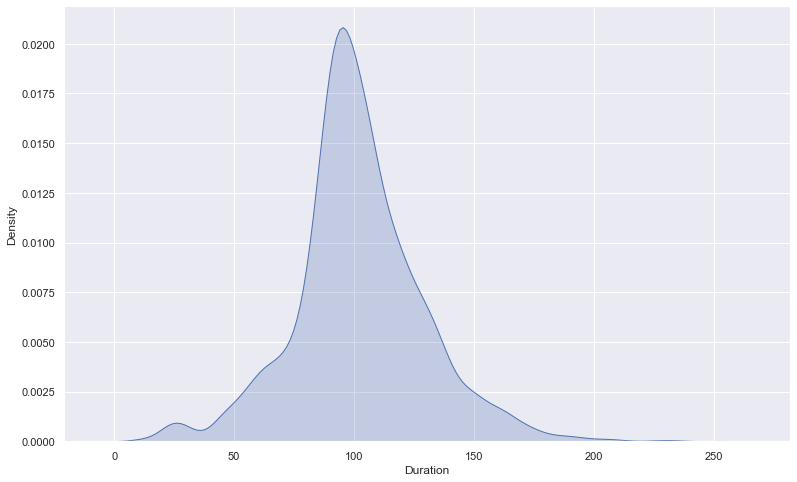

In [97]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,8))
sns.kdeplot(data=movies['Duration'], shade=True)

* So,the majority of movies on Netflix are among the duration of 75-120 mins. 
* It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.
* Can you ? 

## Names

In [98]:
from collections import Counter

genres=list(movies['Listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

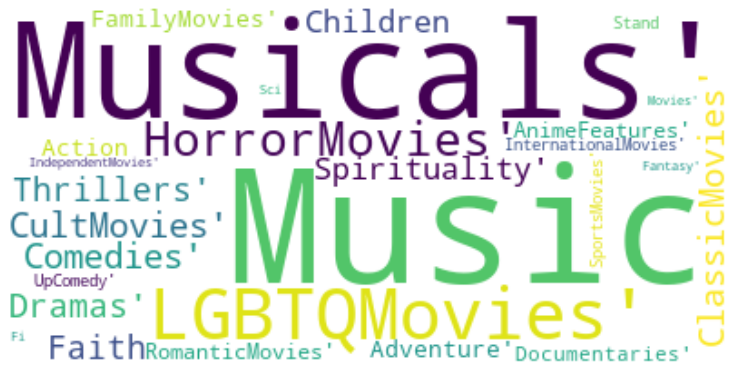

In [99]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud

stopwords = set(STOPWORDS)               
wc = WordCloud(max_words=10000,background_color="white").generate(str(text))

plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

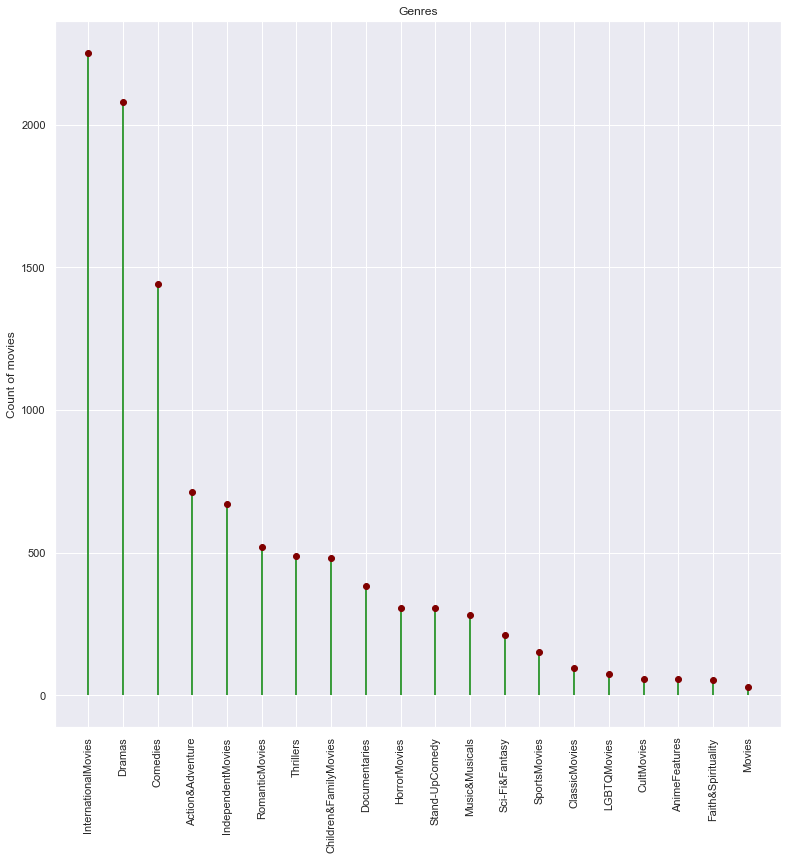

<Figure size 720x720 with 0 Axes>

In [100]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

## Recommendation System

* The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF)) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. 
* This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
# Removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string
df['Description'] = df['Description'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['Description'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(4975, 13907)

In [103]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [104]:
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [105]:
def get_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['Title'].iloc[movie_indices]

### Let's see now, the results of our recommendation sustem

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

<br>

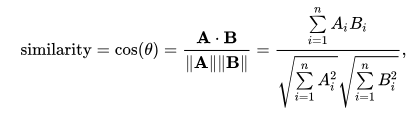

* We have to call the get_recommendations() and then write the movie or tv_shows we want to find similars

In [106]:
get_recommendations('American History X')

658         Baahubali 2: The Conclusion (Tamil Version)
657     Baahubali 2: The Conclusion (Malayalam Version)
2094                                   Fakta Ladh Mhana
5078                                     Raja Natwarlal
7029                                 The Young Vagabond
4164                                       Mohenjo Daro
944                                               Black
4754                       Panipat - The Great Betrayal
5296                                               Rukh
3953                            Martial Arts of Shaolin
Name: Title, dtype: object

In [107]:
get_recommendations('Gangs of New York')

2994                                    Indiscretion
1798                             Dolemite Is My Name
659       Baahubali: The Beginning (English Version)
660         Baahubali: The Beginning (Hindi Version)
662         Baahubali: The Beginning (Tamil Version)
661     Baahubali: The Beginning (Malayalam Version)
6360                                 The Flintstones
3862                                      Mahabharat
2151                                            Fida
1283                                 Charlotte's Web
Name: Title, dtype: object